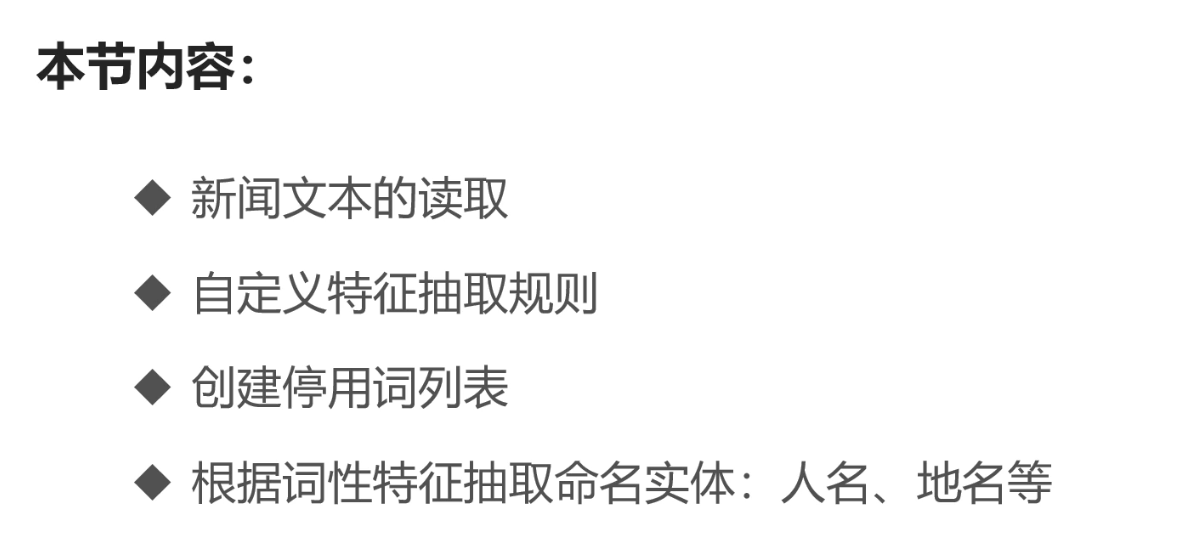

In [3]:
import re
import jieba
import sys
import matplotlib
import jieba.posseg as ps
from nltk import *
from matplotlib import rcParams
from matplotlib.font_manager import findfont, FontProperties, _rebuild
from universalMethod import *

# 读取文本信息
def readFile(path):
    str_doc = ""
    with open(path, 'r', encoding='utf-8') as f:
        str_doc = f.read()
    return str_doc

# 正则对字符串清洗
def textParse(str_doc):
    # 去掉字符
    str_doc = re.sub('\u3000', '', str_doc)
    # 去除空格
    str_doc = re.sub('\s+', ' ', str_doc)
    # 去除换行符
    str_doc= re.sub('[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', " ", str_doc)
    # 正则过滤掉特殊符号,标点,英文,数字...
    r1 = '[a-zA-Z0-9]+'
    str_doc = re.sub(r1, "", str_doc)
    return str_doc

def get_stop_words(path=r'./停用词.txt'):
    file = open(path, 'r', encoding='utf-8').read().split('\n')
    return set(file)

def rm_tokens(words, stwlist):
    words_list = list(words)
    stop_words = stwlist
    for i in range(words_list.__len__())[::-1]:
        # 去除停用词
        if words_list[i] in stop_words:
            words_list.pop(i)
        # 去除数字
        elif words_list[i].isdigit():
            words_list.pop(i)
        # 去除单个字符
        elif len(words_list[i]) == 1:
            words_list.pop(i)
        # 去除空格
        elif words_list[i] == " ":
            words_list.pop(i)
    return words_list

def seg_doc(str_doc):
    # 1.处理原文本
    sent_list = str_doc.split('\n')
    sent_list = map(textParse, sent_list)
    # 2.获取停用词
    stwlist = get_stop_words()
    # 3.分词并去除停用词
    word_2dlist = [rm_tokens(jieba.cut(part, cut_all=False), stwlist) for part in sent_list]
    # 4. 合并列表
    word_list = sum(word_2dlist, [])
#     print(sent_list)
    return word_list

def nltk_wf_feature(word_list=None):
    # 方法一: 得到的关键词和词频不是一一对应的
    fdist = FreqDist(word_list)
#     print(fdist.keys(), "\n", fdist.values(), "\n")
    
    # 查看指定词语词频
    w = "陈奕迅"
    print(w, "Frequency: ", fdist.freq(w))
    print(w, "Num of app: ", fdist[w])
    
    # 频率分布表
    print('='*3, "频率分布表", '='*3)
    fdist.tabulate(10)
    
    print('='*3, "频率分布图", '='*3)
    fdist.plot(30)
    
    return fdist
    
    # 解决中文显示问题
    # 1.查看当前字体
    # 2.更换字体库

def nltk_wf_feature2(word_list=None):
    # 方法二: 
    from collections import Counter
    words = Counter(word_list)
    print(words.keys(), "\n", words.values())
    print("------根据字符长度------")
    wlist = [w for w in words if len(w) > 2]
    print(wlist)
    
def hl_freqWord(fdist):
    wordList = []
    print('='*3, '打印统计的词频', '='*3)
    for key in fdist.keys():
        if fdist.get(key) > 2 and fdist.get(key) < 20:
            wordList.append(key + ":" + str(fdist.get(key)))
    return wordList

def extract_featureWord(str_doc):
    featureWords = ""
    stwList = get_stop_words()
    # user defined the property lis of feature word: 人名, 地名, 机构名
    user_pos_list = ['nr', 'ns', 'nt', 'nz']
    for word, pos in ps.cut(str_doc):
        if word not in stwList and pos in user_pos_list:
            if word + ' ' + pos + '\n' not in featureWords:
                featureWords += word + ' ' + pos + '\n'
    print('\n命名实体识别:\n')
    print(featureWords)
    return featureWords

In [4]:
if __name__ == '__main__':
    # 1.read file
    path = r'./海外网评:正面回击!中方对等制裁释放三大信号.txt'
    str_doc = readFile(path)
    print(str_doc)
    extract_featureWord(str_doc)

7月13日，外交部发言人华春莹宣布中方对美实施对等制裁。 （图源：外交部网站）

　　7月13日，针对美方7月9日宣布根据美国国内法对一家中国新疆政府机构和4名官员实施制裁一事，中方宣布对美方“国会—行政部门中国委员会”及美国务院国际宗教自由无任所大使布朗巴克、联邦参议员鲁比欧、克鲁兹、联邦众议员史密斯实施相应制裁。

　　短短四天时间，从警告敦促到重锤落下，中国的对等制裁措施行动迅速、态度果断，清晰向外界释放出三大信号。

　　第一，中国正当防卫，合情合理。不干涉别国内政是国际关系的基本准则，也是中国长期秉持的外交传统。但友好不等于怯懦，和平也绝非退让，中国绝不接受任何无端指责，也必将坚守自己的原则底线。中国社科院美国研究所所长倪峰表示，美方屡屡挑起事端，对中方官员和机构实施制裁在先，中方的相应制裁是对美方错误行为的正当反击。细查这次被列入中方制裁名单的机构和个人，哪个不是劣迹斑斑？

　　成立于2000年的美国“国会—行政部门中国委员会”，20年间，该机构以“监察中国法治发展和人权”之名，行抹黑造谣之实；布朗巴克，反华言论“中国已经对信仰宣战”的捏造者，多次游说特朗普政府对中国官员实施制裁；鲁比欧，共和党“反华急先锋”，美国政府炮制的各类反华议题背后都能看到他的身影；克鲁兹，曾在香港“修例风波”正盛之际，公然赴港作秀表演，声援密会乱港分子；史密斯，去年11月和今年1月先后在两届国会推出所谓“维吾尔人权政策法案”。这些美国政客在反华议题上摇唇鼓舌、颠倒黑白、公然干涉中国内政，受到中方反制一点也不冤。

　　第二，中国不惹事，也不怕事。对这一点，相信在美国挑起的对华贸易战中已经深有体会。两年多来，挥舞关税大棒的美国政府摆明了来者不善，也的确气势汹汹，但结果如何呢？不仅美国的“速胜论”破灭了，美国的全面压力没有把中国经济打趴下，中国的反制力量还迫使美国不得不回到谈判桌上。更值得玩味的是，中国于今年4月重新成为美国第一大贸易伙伴，而美国在中国对外贸易中的位置则下跌至第三位。这意味着，美方对华打了两年多贸易战，中国对美国贸易的重要性相对上升了，而美国对中国贸易的重要性却相对下降了。

　　美国不仅打“贸易牌”奈何不了中国，打“新疆牌”同样徒劳无益。无论美方搞出多少所谓涉疆法案，注定皆是废纸；无论美方长臂管辖的手伸得再长，都必定被斩断；无论美方恫吓制裁的气焰多么嚣张，都是白

In [18]:
a = "a"
b = "b"
c = []
d = (a, b)
c.append(d)

In [19]:
c

[('a', 'b')]

In [23]:
for e,f in c:
    print (e,f)

a b


In [27]:
a = {'username': 'muzhong85746197@163.com', 'cookies': '_2A25yE8h0DeRhGeFN6VMV9y_FyDmIHXVR_-g8rDV6PUJbktANLRDDkW1NQEMCU26FoQwUTHct8Mr7xTKPOm24Wjur;'}
b = ('muzhong85746197@163.com', '_2A25yE8h0DeRhGeFN6VMV9y_FyDmIHXVR_-g8rDV6PUJbktANLRDDkW1NQEMCU26FoQwUTHct8Mr7xTKPOm24Wjur;')

In [26]:
a['username']

'muzhong85746197@163.com'

In [28]:
b['username']

TypeError: tuple indices must be integers or slices, not str